In [1]:
# Collect 2 types of data-> login page, non-login
# Small Network-> idea of Convolutional Neural Network

# Regularize-> making tweaks in the output to make it closer to desired labels 
# Hyperparameter Optimization-> Learning Rate, Number of dimensions-> make my model better

# First build->Brute force approach
# Optimized->Dropout-> pop-up on top of login page-> detect it

In [35]:
!wget https://workyworkshop.blob.core.windows.net/mydata/datascreenshots.zip
!unzip datascreenshots.zip


--2021-07-29 10:18:28--  https://workyworkshop.blob.core.windows.net/mydata/datascreenshots.zip
Resolving workyworkshop.blob.core.windows.net (workyworkshop.blob.core.windows.net)... 52.239.170.100
Connecting to workyworkshop.blob.core.windows.net (workyworkshop.blob.core.windows.net)|52.239.170.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6245185 (6.0M) [application/x-zip-compressed]
Saving to: ‘datascreenshots.zip’

datascreenshots.zip 100%[===================>]   5.96M  17.9MB/s    in 0.3s    

2021-07-29 10:18:28 (17.9 MB/s) - ‘datascreenshots.zip’ saved [6245185/6245185]

Archive:  datascreenshots.zip
replace loginpage/0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: loginpage/0001.png      
replace loginpage/0002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: loginpage/0002.png      
  inflating: loginpage/0004.png      
  inflating: loginpage/0008.png      
  inflating: loginpage/0010.png      
  inflating: otherpage/0003

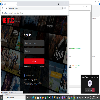

In [25]:
y# Convolutional Neural Network
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('/content/data/loginpage/0008.png')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

553476096/553467096 [==============================] - 6s 0us/step


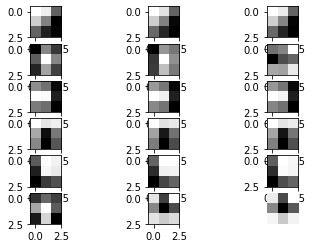

In [4]:


import tensorflow as tf # open source library for scientific methods and vector math 
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() 
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels-fmin)/(fmax - fmin) # Zscore, MinMax normalizing 
n_filters, ix=6,1 

for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.axis('off')
plt.show()



In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('/content/data/loginpage/0010.png', target_size=(224,224))

In [37]:
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape

(224, 224, 3)

In [38]:
img[100] # RGB pixels of first row


array([[254., 254., 254.],
       [242., 242., 242.],
       [ 96.,  97.,  98.],
       [ 96.,  97.,  98.],
       [100.,  46.,  40.],
       [ 99.,  46.,  39.],
       [ 99.,  46.,  39.],
       [ 99.,  46.,  40.],
       [ 99.,  46.,  40.],
       [ 99.,  46.,  40.],
       [ 99.,  46.,  41.],
       [ 99.,  46.,  42.],
       [ 99.,  46.,  42.],
       [ 99.,  46.,  42.],
       [ 99.,  46.,  42.],
       [ 99.,  45.,  42.],
       [ 99.,  45.,  43.],
       [ 99.,  45.,  43.],
       [ 99.,  45.,  43.],
       [ 99.,  45.,  43.],
       [ 99.,  45.,  44.],
       [ 99.,  45.,  44.],
       [ 99.,  45.,  44.],
       [ 99.,  45.,  44.],
       [ 99.,  45.,  44.],
       [ 99.,  44.,  45.],
       [ 99.,  44.,  46.],
       [ 99.,  44.,  46.],
       [100.,  44.,  46.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
       [ 40., 116., 240.],
 

In [39]:
kernels.shape

(3, 3, 3, 64)

In [40]:
print(kernels[0,0])

[[ 0.42947057  0.11727387  0.03401296  0.35422093 -0.0865837   0.22968295
   0.06683242  0.04133838  0.13026784  0.03291035  0.09615457 -0.09222532
  -0.15587331  0.0522968  -0.08324417  0.15728769  0.0291196   0.05094835
   0.19055748 -0.04372229  0.3618031   0.23902874  0.16667192 -0.18046746
   0.04404821  0.09592837 -0.04381131 -0.1884835  -0.04399502 -0.18985446
  -0.23386982  0.12836744 -0.11059975  0.00571336 -0.24479656 -0.30530283
   0.060938   -0.32816252  0.1711953   0.10265407 -0.11063665  0.33012986
  -0.05869728  0.18478717  0.01050853  0.10668027 -0.13086924 -0.36283946
   0.06440807  0.09335972  0.00401619  0.37814805  0.05268804 -0.27078936
   0.11060741 -0.11819526  0.04298935  0.35323623 -0.28468162 -0.20289008
  -0.284944   -0.13224158 -0.05334752  0.00757738]
 [ 0.55037946  0.02087744  0.09883115  0.43703237 -0.10985146 -0.19237703
   0.09789737  0.07935189 -0.2751774  -0.14232883  0.17323188  0.04103169
   0.29249442  0.01629656 -0.12607214 -0.15555367 -0.05317234

In [41]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img)

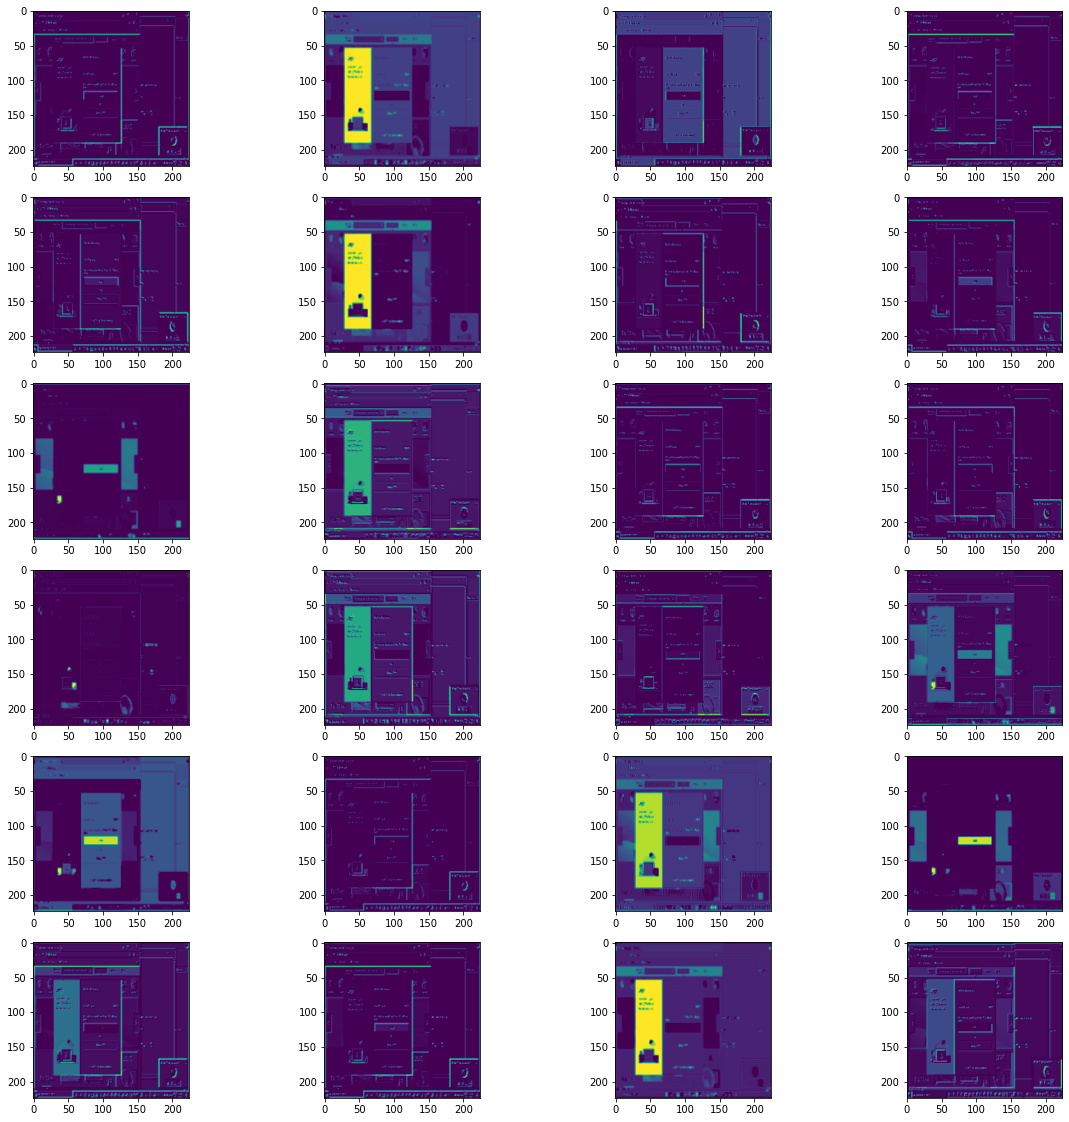

In [42]:
sz = 8
index = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0,:,:, index-1])
  index=index + 1
plt.show()

In [43]:
# y = w1*x1....wn*xn + b
# from matrix to straight line
# in prev example, we broke 1 vector into multiple vectors
# Matrix-> we will break into multiple vectors
# Conv-> 1D, 2D, 3D
# 1) Generate As Many Filters as Possible [breaking matrix into matrices] [Convolution block]
# 2) Flatten 2-D matrices into 1-D list [Flattening layer]
# 3) Deep Learning-> Dense(Relu) + Dense(Softmax)

# Matrix-> [[p1,p2,p3],[p4,p5,p6],[p7,p8,p9]]
# Flattening-> 0 w,b-> no learning-> flattening the matrix
# M-> flatten-> [p1,p2,p3....p9]
# Dense-> [p1.....p9]

In [44]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import backend as k
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [45]:
HP_filter1 = (3,3)
HP_filter2 = (2,2)
HP_epochs = 20
HP_init_lr = 0.01
HP_image_dim = (96,96,3)
HP_batch_size = 1

In [46]:
class AnacondaVGG:
  @staticmethod
  def buildmodel(height, width, depth, classes):
    # Tensorflow-> Pytorch-> Theanos-> H20-> scikitlearn
    # images-> (depth,h,w) or (h,w,depth)
    # depth-> R,G,B or B/w or Infrared or CMY or BHS
    # tensorflow -> channel last-> (h,w,-1)-> red from last and get no. of channels
    # each channel will be broken and learnt separately
    channel_dim = -1
    #block1
    inputshape = (height, width, depth)
    model = keras.Sequential()
    model.add(Conv2D(32, HP_filter1, padding='same', input_shape=inputshape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_filter1))
    model.add(Dropout(0.20))

    #block 2
    model.add(Conv2D(64, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(64, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_filter2))
    model.add(Dropout(0.20))

    #block 3
    model.add(Conv2D(128, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(128, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_filter2))
    model.add(Dropout(0.20))

    #block 4
    model.add(Conv2D(256, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(256, HP_filter1, padding='same'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_filter2))
    model.add(Dropout(0.20))



    #block_final
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

In [ ]:
dataset = 'mydata'
modelpath = 'model'
outputpath = 'model/labels.bin'
metricspath = 'model/metrics'
evaldataset = ''
testdataset = ''